In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Adult Performers

In [239]:
channels = pd.read_csv('channels.csv')

In [240]:
channels.head()

,Unnamed: 0,name,url,video_count,total_views,subscribers,no_of_photos,bio,free_videos,premium_videos,sex,age,location
0,0,Ajibola Elizabeth,/amateur-channels/ajibola_elizabeth,76,"29,645,400",66.1k,499,Grammy Nominated Pussy..I like being paid to s...,45.0,31,Female,25,NaN
1,1,Queen Anita,/model-channels/queen_anita,47,"28,770,702",15.9k,4,"Naija Most Wanted Porn Queen.\r\nPlease, Stay ...",30.0,17,Female,36,NaN
2,2,The Queens Show,/channels/naija_queens,140,"50,234,486",44.5k,19,Thanks for watching our videos.no one is a cha...,85.0,55,Male,36,NaN
3,3,Uglygalz,/amateur-channels/uglygalz1,106,"30,704,017",37k,197,Click on my banner for more videos... \r\nDON’...,70.0,36,Female,25,NaN
4,4,Nolly Porn,/model-channels/nolly_porn,246,"272,551,386",76.7k,36,Follow On Instagram @krissyjohchris\nNigeria n...,170.0,76,Male,32,NaN


In [241]:
del channels['Unnamed: 0']

In [242]:
channels.shape

(52, 12)

In [243]:
channels.dropna(axis=1, inplace=True)

In [244]:
channels.isnull().sum()

name              0
url               0
video_count       0
total_views       0
subscribers       0
no_of_photos      0
free_videos       0
premium_videos    0
sex               0
age               0
dtype: int64

In [245]:
#total views
channels['total_views'] = channels['total_views'].str.replace(',', '').astype(float)

In [246]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0
    return 0.0

In [247]:
channels['subscribers'] = channels['subscribers'].apply(value_to_float)

In [248]:
channels.head()

,name,url,video_count,total_views,subscribers,no_of_photos,free_videos,premium_videos,sex,age
0,Ajibola Elizabeth,/amateur-channels/ajibola_elizabeth,76,29645400.0,66100.0,499,45.0,31,Female,25
1,Queen Anita,/model-channels/queen_anita,47,28770702.0,15900.0,4,30.0,17,Female,36
2,The Queens Show,/channels/naija_queens,140,50234486.0,44500.0,19,85.0,55,Male,36
3,Uglygalz,/amateur-channels/uglygalz1,106,30704017.0,37000.0,197,70.0,36,Female,25
4,Nolly Porn,/model-channels/nolly_porn,246,272551386.0,76700.0,36,170.0,76,Male,32


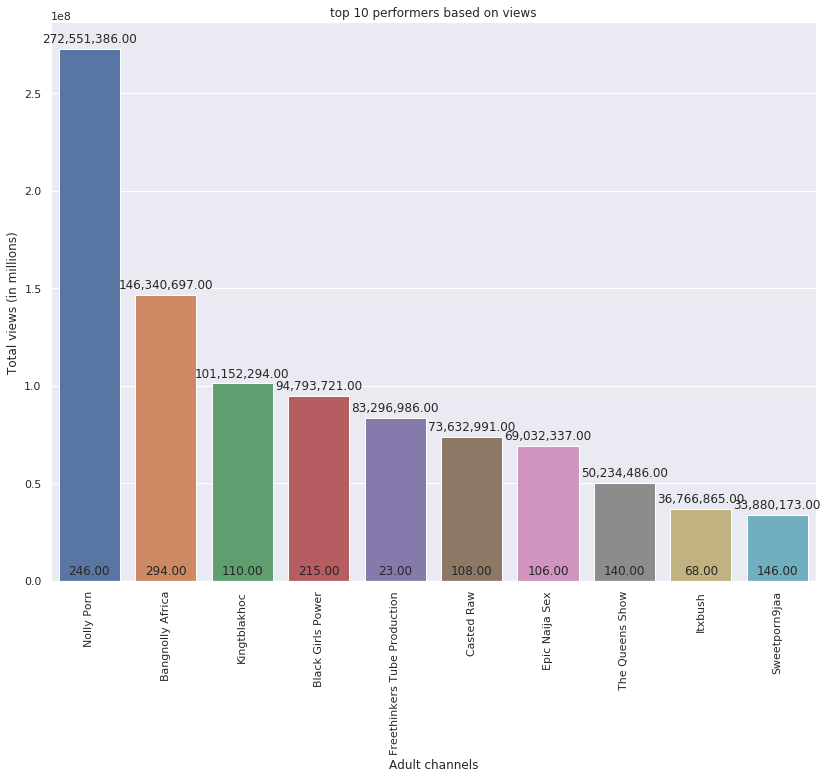

In [249]:

sns.set(style="darkgrid", rc={'figure.figsize':(13.7,10.27)})
#top 10 performers based on views

data_based_views = channels.sort_values('total_views', ascending=False).head(10)
chart = sns.barplot(x = 'name', y='total_views', data=data_based_views)
chart = sns.barplot(x = 'name', y='video_count', data=data_based_views) 
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title('top 10 performers based on views')
chart.set(xlabel='Adult channels', ylabel='Total views (in millions)')

for p in chart.patches:
    #chart.annotate(data['video_count'], (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    chart.annotate("{:,.2f}".format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Text(0.5,1,'Relationship between videos uploaded and accumulated views')

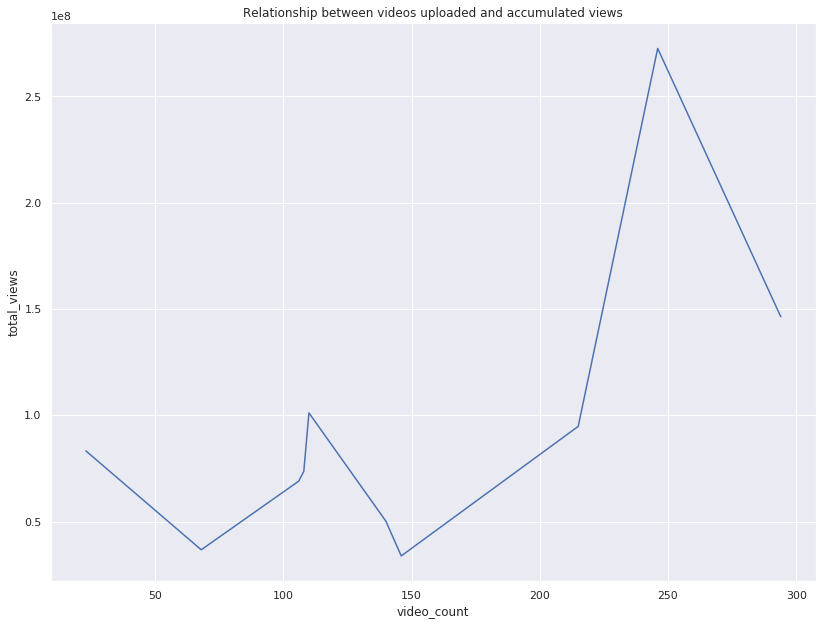

In [270]:
video_views = sns.lineplot('video_count', 'total_views', data=data_based_views)
video_views.set_title('Relationship between videos uploaded and accumulated views')
#rate of videos upload is not directly proportional to views

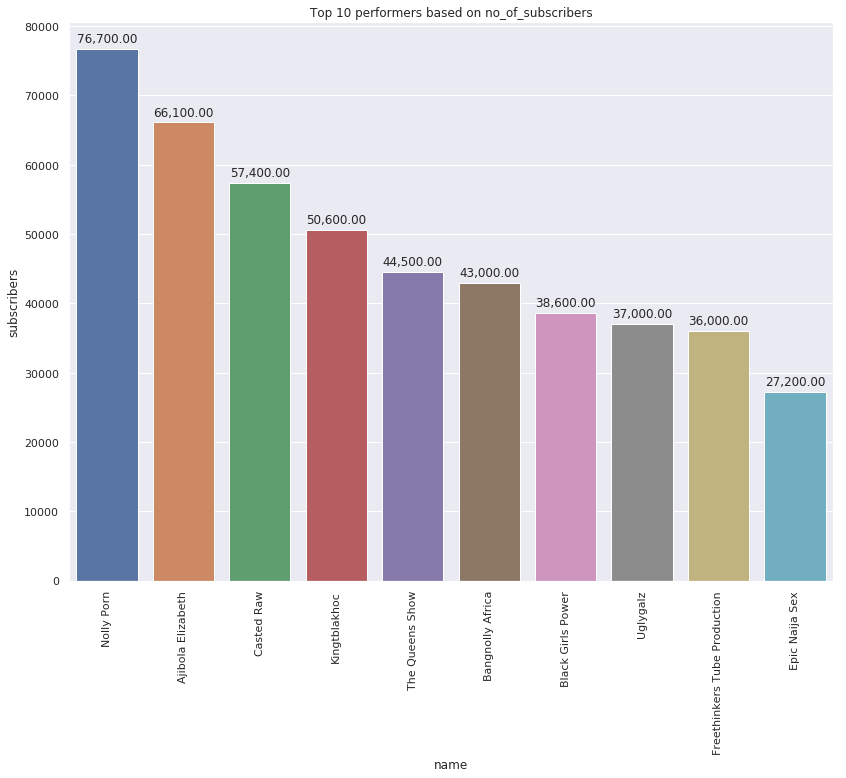

In [251]:
#top 10 performers based on no_of_subscribers
chart.set(xlabel='Adult channels', ylabel='Total Subscribers')
data = channels.sort_values('subscribers', ascending=False).head(10)
chart = sns.barplot(x = 'name', y='subscribers',data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title('Top 10 performers based on no_of_subscribers')
for p in chart.patches:
    chart.annotate("{:,.2f}".format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Text(0.5,1,'Relationship between subscribers and accumulated views')

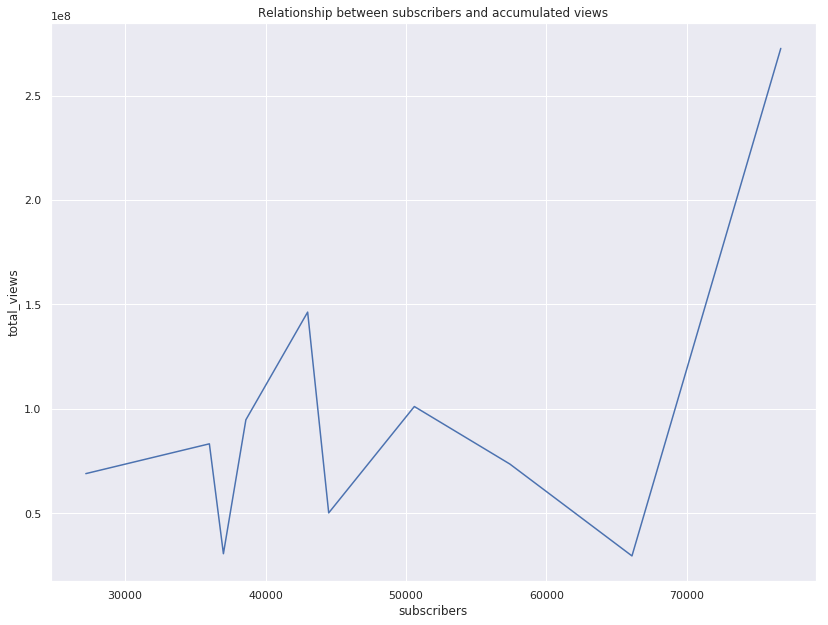

In [269]:
sub_views = sns.lineplot(x="subscribers", y="total_views", data=data)
sub_views.set_title('Relationship between subscribers and accumulated views')
#subscribers vs total views...not directly proportional

In [255]:
#top 5 male performers
data_male_performers = channels[channels['sex'] == 'Male']

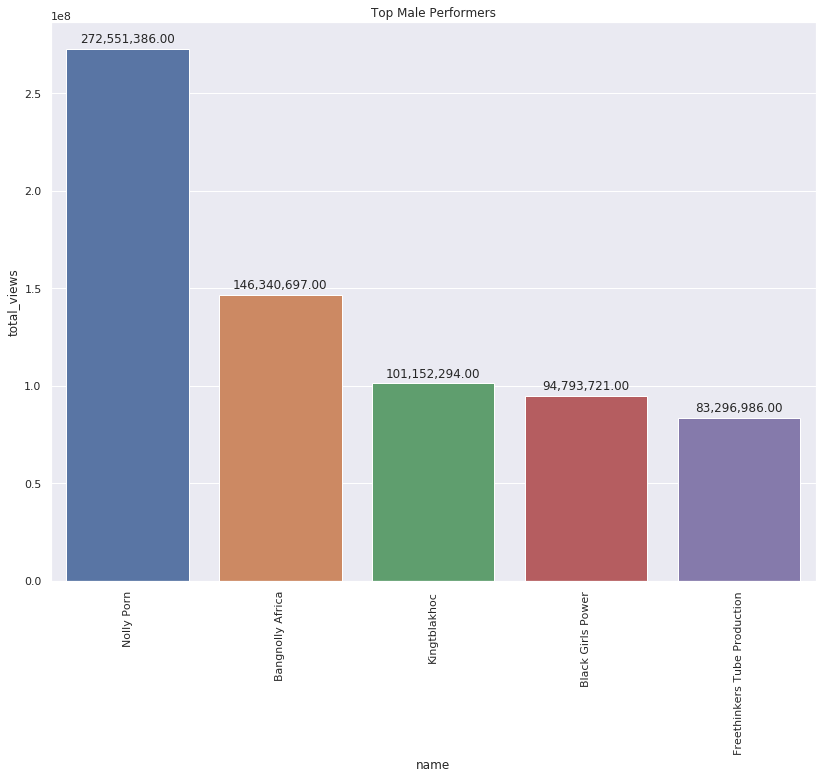

In [256]:
chart = sns.barplot(x = 'name', y='total_views',data=data_male_performers.sort_values('total_views', ascending=False).head(5))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title('Top Male Performers')
for p in chart.patches:
    chart.annotate("{:,.2f}".format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

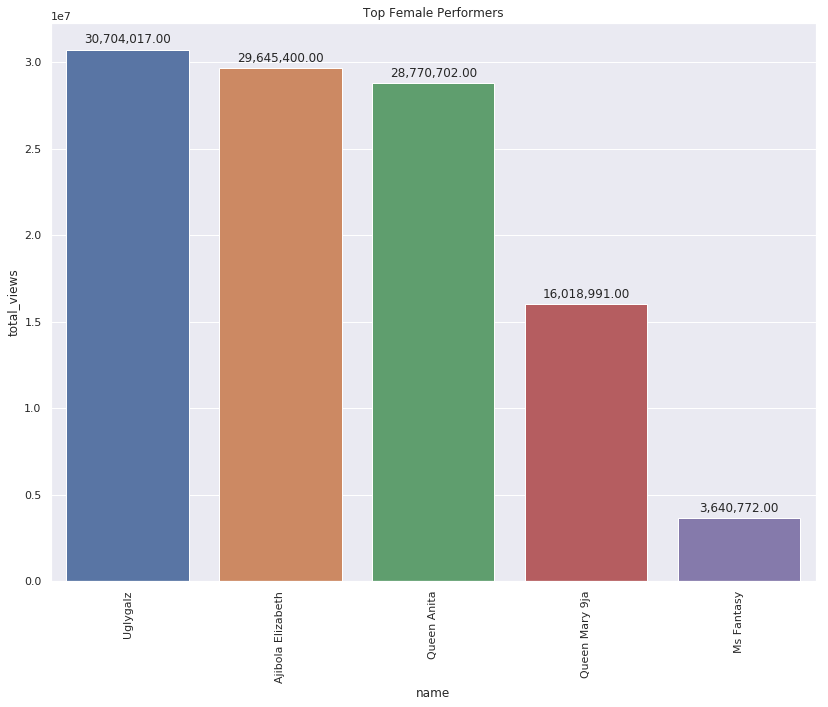

In [257]:
#top female performers
data_female_performers = channels[channels['sex'] == 'Female']
chart = sns.barplot(x = 'name', y='total_views',data=data_female_performers.sort_values('total_views', ascending=False).head(5))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title('Top Female Performers')
for p in chart.patches:
    chart.annotate("{:,.2f}".format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [261]:
#average age of performer
avg_age = channels['age'].mean()
round(avg_age)

27

In [271]:
#total number of verified performers
len(channels)

52

Text(0.5,1,'Free vs Premium videos for top performers')

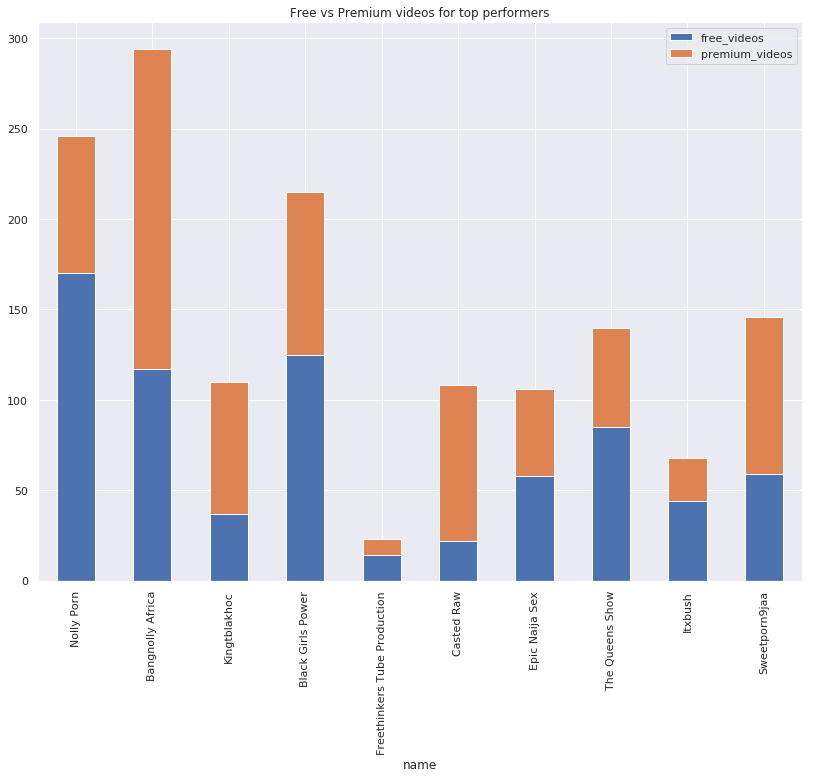

In [285]:
stacked = data_based_views[['name', 'free_videos', 'premium_videos']]
video_cat = stacked.plot(kind='bar',stacked=True,legend=True, x='name')
video_cat.set_title('Free vs Premium videos for top performers')

# Adult Videos